# TERM DEPOSIT PREDICTION

#### IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

pd.set_option('display.max_columns',None)


#### READING DATA

In [3]:
df=pd.read_csv("C:/Users/abina/New folder/DATASETS/bank-additional-full.csv",sep=";")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### DESCRIBE STATISTICS

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### **DATA PREPROCESSING** 

##### **DROP UNWANTED COLUNMS**

In [7]:
df1=df.drop(['pdays','contact','default'],axis=1)

##### **MISSING VALUE**

In [8]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
df.isna().sum().sum()

0

NO null,nan value in our dataset

##### **DROP DUPLICATES**

In [10]:
df1[df1.duplicated()]

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,may,thu,124,1,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
5664,56,blue-collar,married,basic.4y,no,no,may,mon,136,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
12261,36,retired,married,unknown,no,no,jul,thu,88,1,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,jul,mon,331,2,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,yes,no,jul,thu,43,3,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,yes,no,jul,thu,128,1,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
19608,33,admin.,married,university.degree,yes,no,aug,thu,59,1,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
20216,55,services,married,high.school,no,no,aug,mon,33,1,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,yes,no,aug,tue,127,1,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,nov,tue,123,2,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no


In [11]:
df1.drop_duplicates(inplace=True)
df1[df1.duplicated()].size

0

##### **OUTLIER TREATMENT**

In [12]:
numerical_features=df1.select_dtypes(exclude='object').columns.tolist()
print(numerical_features)

['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


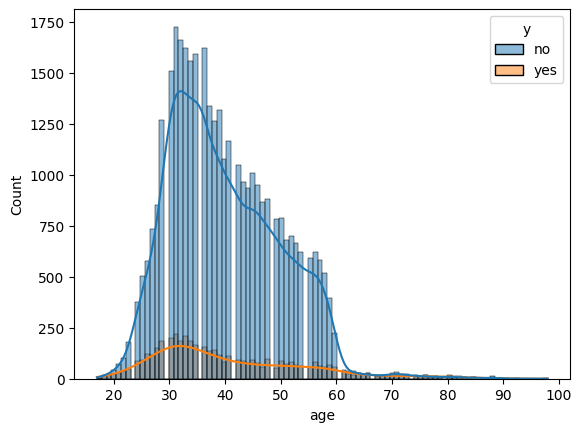

In [13]:
sns.histplot(df1,x="age",hue='y',kde=True)
#sns.boxplot(df,x='age',hue='y')
plt.show()

- The distribution of values within the age column suggests a positive skew due to the presence of large values, indicating an asymmetrical distribution skewed towards higher numerical values.

<Axes: xlabel='age'>

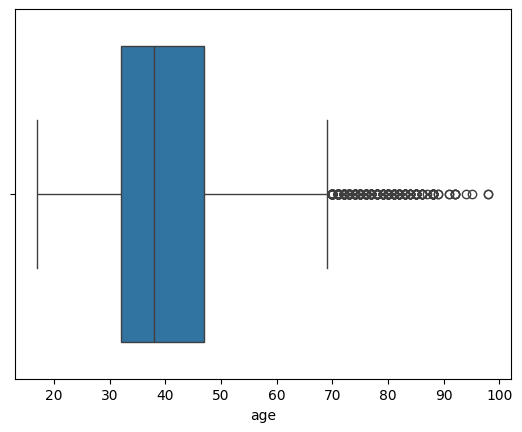

In [14]:
sns.boxplot(df1,x='age')

- The `age` column appears to contain numerous outlier values, indicating the presence of data points that significantly deviate from the majority, potentially influencing statistical analyses or modeling outcomes

In [15]:
def  show_distributions(data,col):
    plt.figure(figsize=(10,5))
    #1
    plt.subplot(1,3,1)
    sns.histplot(np.log1p(data[col]),kde=True,color="skyblue")
    plt.title("log transformation")
    #2
    plt.subplot(1,3,2)
    sns.histplot(np.cbrt(data[col]),kde=True,color="white")
    plt.title("cube root transformation")
    #3
    plt.subplot(1,3,3)
    sns.histplot(np.sqrt(data[col]),kde=True,color="red")
    plt.title("square root transformation")
    
    plt.suptitle(f'Distributions for column {col}', fontsize=16, y=1.05)

    plt.tight_layout()
    plt.show()
    print(f"Skewness with log = {round(np.log1p(data[col]).skew(),4)} and with cubic root = {round(np.cbrt(data[col]).skew(),4)} and with square root = {round(np.sqrt(data[col]).skew(),4)}")


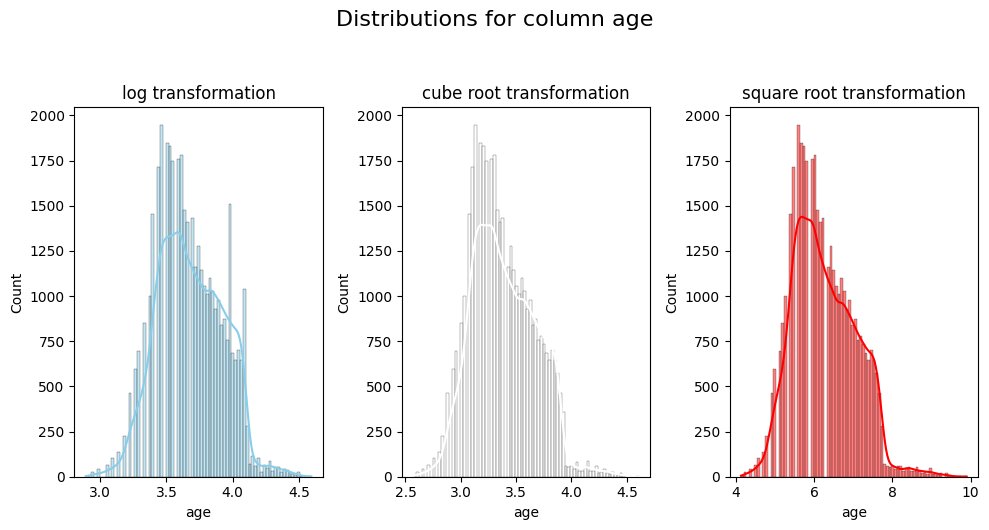

Skewness with log = 0.1413 and with cubic root = 0.3335 and with square root = 0.4405


In [16]:
show_distributions(df1,"age")

- The observed characteristics of the data suggest that log transformation stands out as the most effective method for addressing skewness and improving the distribution's symmetry

In [17]:
def show_qq(data,col):
    plt.figure(figsize=(8, 4))
    # Plotting the first distribution
    plt.subplot(1, 3, 1)
    stats.probplot(np.log1p(data[col]), dist="norm", plot=plt)
    plt.title('log transformation')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')



    # Plotting the second distribution
    plt.subplot(1, 3, 2)
    stats.probplot(np.cbrt(data[col]), dist="norm", plot=plt)
    plt.title('cubic root transformation')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')


    # Plotting the third distribution
    plt.subplot(1, 3, 3)
    stats.probplot(np.sqrt(data[col]), dist="norm", plot=plt)
    plt.title('sqaure root transformation')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')


    plt.suptitle(f'Q-Q plot for column {col}', fontsize=16, y=1.05)


    plt.tight_layout()
    plt.show()


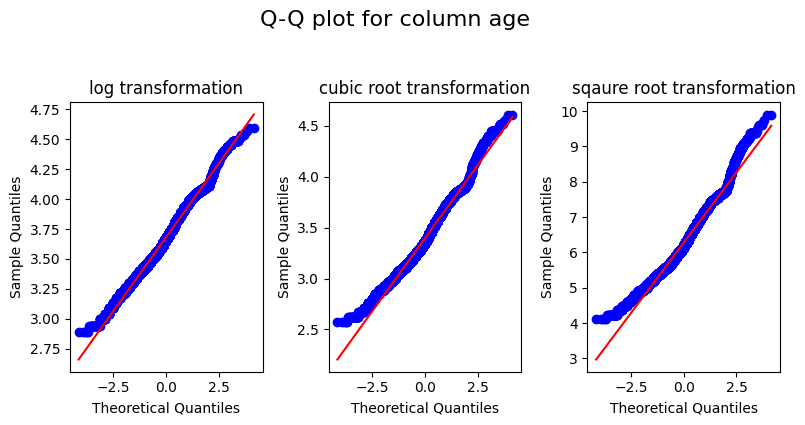

In [18]:
show_qq(df1,"age")

- The Q-Q plot analysis indicates that the log-transformed data aligns most closely with the theoretical normal distribution compared to other transformations, suggesting its superior fit and approximation to normality.

In [19]:
def show_log_distribution(data,col):
    plt.figure(figsize=(8, 4))
    # Plotting the first distribution
    plt.subplot(1, 3, 1)
    sns.histplot(np.log1p(data[col]),kde=True,  color='skyblue')
    plt.title('log transformation')


    # Plotting the second distribution
    plt.subplot(1, 3, 2)
    sns.histplot(np.log2(data[col]),kde=True,  color='salmon')
    plt.title('log transformation base 2')

    # Plotting the third distribution
    plt.subplot(1, 3, 3)
    sns.histplot(np.log10(data[col]),kde=True, color='green')
    plt.title('log transformation base 10')

    plt.suptitle(f'Distributions for column {col}', fontsize=16, y=1.05)


    plt.tight_layout()
    plt.show()
    print(f"Skewness with log = {round(np.log1p(data[col]).skew(),4)} and with log base 2 = {round(np.log2(data[col]).skew(),4)} and with log base 10 = {round(np.log10(data[col]).skew(),4)}")

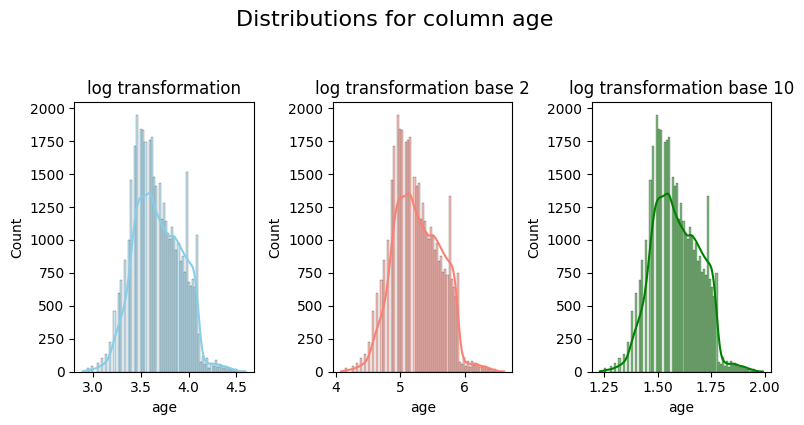

Skewness with log = 0.1413 and with log base 2 = 0.1258 and with log base 10 = 0.1258


In [20]:
show_log_distribution(df1,"age")

- It seems that both log transformations with base 2 and base 10 yield analogous outcomes, showing comparable adjustments in the data's distribution, especially noticeable in the context of the age column.

In [21]:
def show_log_qq(data,col):
    plt.figure(figsize=(8, 4))
    # Plotting the first distribution
    plt.subplot(1, 3, 1)
    stats.probplot(np.log1p(data[col]), dist="norm", plot=plt)
    plt.title('log transformation')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')



    # Plotting the second distribution
    plt.subplot(1, 3, 2)
    stats.probplot(np.log2(data[col]), dist="norm", plot=plt)
    plt.title('log base 2 transformation')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')


    # Plotting the third distribution
    plt.subplot(1, 3, 3)
    stats.probplot(np.log10(data[col]), dist="norm", plot=plt)
    plt.title('log base 10 transformation')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')


    plt.suptitle(f'Q-Q plot for column {col}', fontsize=16, y=1.05)


    plt.tight_layout()
    plt.show()


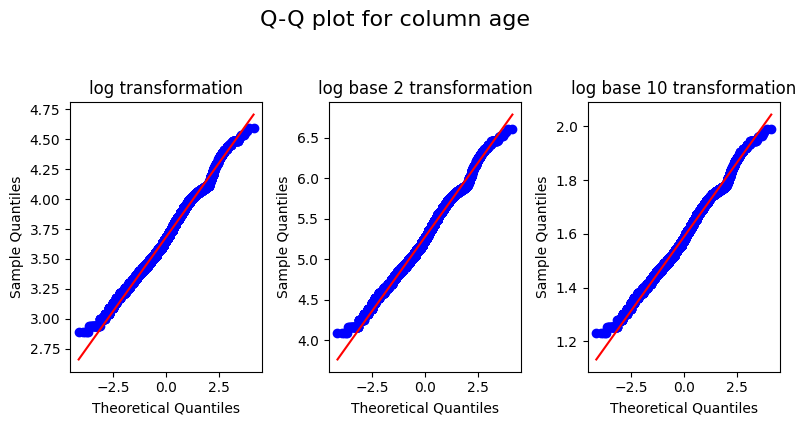

In [22]:
show_log_qq(df1,"age")

- Both logarithmic transformations with base 2 and base 10 exhibit an identical pattern in their Q-Q plots, showcasing a highly similar alignment with the theoretical normal distribution, indicating a parallel distributional approximation for the dataset under consideration

In [23]:
df1["age"]=np.log10(df['age'])

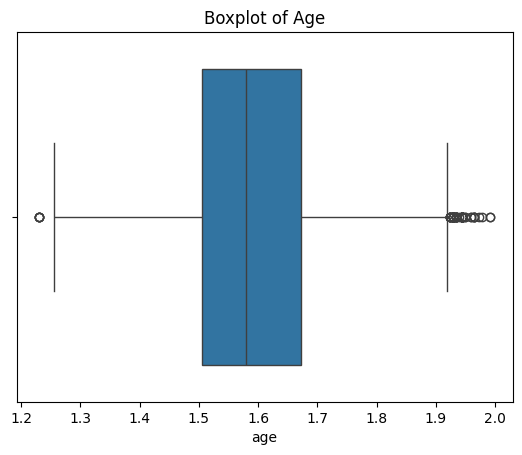

In [24]:
sns.boxplot(df1,x="age")
plt.title('Boxplot of Age')
plt.show()

- After the log transformation, the dataset exhibits a notably reduced number of outliers, indicating the effectiveness of the transformation method in mitigating extreme values within the data.

Substituting outliers in the dataset with the respective upper and lower limit values to maintain data integrity and minimize the impact of extreme values on statistical analyses or modeling procedures.

In [25]:
def calculate_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [26]:
LOWER_LIMIT,UPPER_LIMIT=calculate_outliers(df1["age"])
df1["age"]=np.where(df1['age']<LOWER_LIMIT,LOWER_LIMIT,df1['age'])
df1["age"]=np.where(df1['age']>UPPER_LIMIT,UPPER_LIMIT,df1['age'])


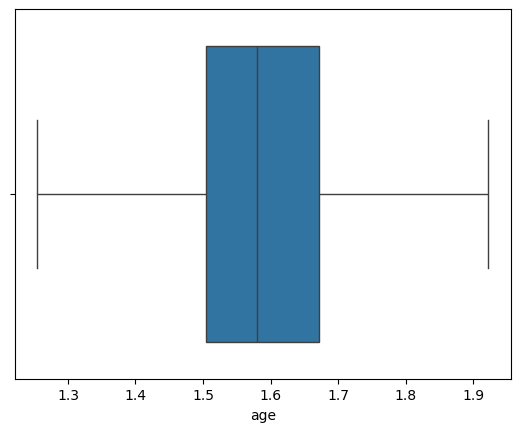

In [27]:
sns.boxplot(df1,x='age')
plt.show()

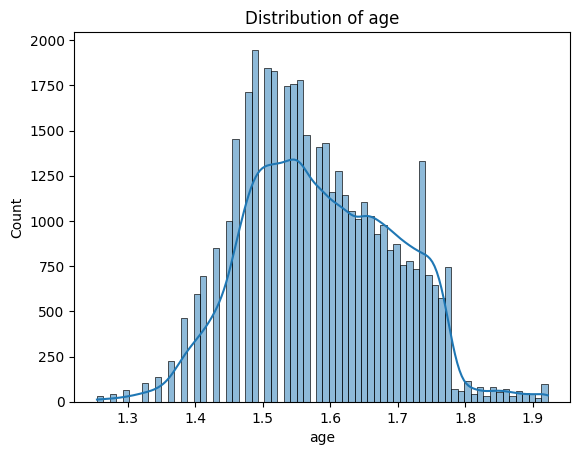

In [28]:
sns.histplot(df1,x="age",kde=True)
plt.title("Distribution of age")
plt.show()

#### **Encoding**

In [29]:
categorical_features=df1.select_dtypes(include='object').columns.tolist()
categorical_features

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [30]:
df2=df1.copy()

Analyzing the unique values within the ALL column to identify the most appropriate encoding technique that efficiently captures the diverse categories, facilitating optimal data transformation for subsequent analysis or modeling purposes.

In [31]:
for col in categorical_features:
    print(col,df2[col].unique())
    #print(col,df1.job.value_counts())


job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


One-Hot Encoding: This is the simplest approach and will create a binary column for each job.

In [32]:
job_mapping = {
    'unknown': -1,
    'student': 0,
    'unemployed': 1,
    'housemaid': 2,
    'self-employed': 3,
    'entrepreneur': 4,
    'retired': 5,
    'management': 6,
    'services': 7,
    'technician': 8,
    'blue-collar': 9,
    'admin.': 10
}


df2['job']=df2['job'].replace(job_mapping)


In [33]:
marital_map={
   'married':2,
   'single':1, 
   'divorced':0,
   'unknown':-1
}
df2['marital']=df2['marital'].replace(marital_map)


In [34]:
education_order = ['unknown','illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']

encoder = OrdinalEncoder(categories=[education_order])

# Fit and transform the 'education' column
df2['education'] = encoder.fit_transform(df2[['education']])

In [35]:
df2.education.value_counts()

education
7.0    12163
5.0     9512
4.0     6045
6.0     5240
2.0     4175
3.0     2291
0.0     1730
1.0       18
Name: count, dtype: int64

In [36]:
df2['housing']=np.where(df2['housing']=="yes",1,np.where(df2['housing']=="no",0,-1))

In [37]:
df2.housing.value_counts()

housing
 1    21570
 0    18614
-1      990
Name: count, dtype: int64

In [38]:
df2['loan']=np.where(df2['loan']=="yes",1,np.where(df2['loan']=="no",0,-1))

In [39]:
df2.loan.value_counts()

loan
 0    33936
 1     6248
-1      990
Name: count, dtype: int64

In [40]:
df1.poutcome.value_counts()

poutcome
nonexistent    35549
failure         4252
success         1373
Name: count, dtype: int64

In [41]:
df2['poutcome']=np.where(df2['poutcome']=="success",1,np.where(df2['poutcome']=="failure",0,-1))

In [42]:
df2.poutcome.value_counts()

poutcome
-1    35549
 0     4252
 1     1373
Name: count, dtype: int64

In [43]:
df2.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [44]:
order=['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'] 
ordinal_encoder=OrdinalEncoder(categories=[order])
df2['month']=ordinal_encoder.fit_transform(df2[['month']])

In [45]:
df2.month.value_counts()

month
2.0    13766
4.0     7169
5.0     6175
3.0     5318
8.0     4100
1.0     2631
7.0      717
6.0      570
0.0      546
9.0      182
Name: count, dtype: int64

In [46]:
df2.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [47]:
order=['mon', 'tue', 'wed', 'thu', 'fri']
ordinal_encoder=OrdinalEncoder(categories=[order])
df2['day_of_week']=ordinal_encoder.fit_transform(df2[['day_of_week']])

In [48]:
df2.day_of_week.value_counts()

day_of_week
3.0    8617
0.0    8511
2.0    8134
1.0    8086
4.0    7826
Name: count, dtype: int64

In [49]:
df2['y']=np.where(df2['y']=="yes",1,0)

In [50]:
df2.y.value_counts()

y
0    36535
1     4639
Name: count, dtype: int64

In [51]:
df2.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.748188,2,2,2.0,0,0,2.0,0.0,261,1,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
1,1.755875,7,2,5.0,0,0,2.0,0.0,149,1,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
2,1.568202,7,2,5.0,1,0,2.0,0.0,226,1,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
3,1.602060,10,2,3.0,0,0,2.0,0.0,151,1,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
4,1.748188,7,2,5.0,0,1,2.0,0.0,307,1,0,-1,1.1,93.994,-36.4,4.857,5191.0,0


In [52]:
df3=df2.copy()

#### Feature selection

In [54]:
df3=df2.copy()

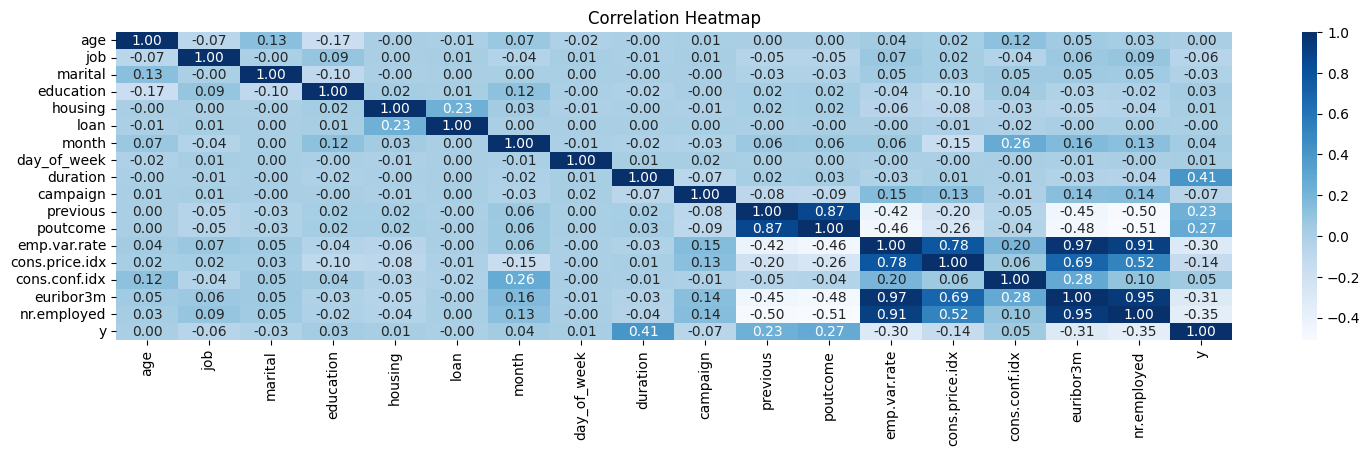

In [55]:
plt.figure(figsize=(18, 4))
sns.heatmap(df3.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

1. Strong Correlations:
- poutcome and previous: These features are highly correlated, indicating a strong relationship between the outcome of previous marketing campaigns and the number of previous contacts.
- Economic indicators: The variables emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed are highly correlated with each other, reflecting the close relationship between economic factors.



In [56]:
fea=df3.corr()['y'].sort_values(ascending=False)[1:]
fea

duration          0.405292
poutcome          0.270394
previous          0.230197
cons.conf.idx     0.054819
month             0.037210
education         0.031745
housing           0.011436
day_of_week       0.009987
age               0.002321
loan             -0.003156
marital          -0.026351
job              -0.055904
campaign         -0.066371
cons.price.idx   -0.136131
emp.var.rate     -0.298281
euribor3m        -0.307733
nr.employed      -0.354663
Name: y, dtype: float64

Moderate Correlations with Target Variable (y)

- duration: The duration of the call has a moderate positive correlation with the target variable, suggesting that longer calls are more likely to result in successful outcomes.
- poutcome and previous: These features also show moderate positive correlations with the target variable, indicating that previous successful campaigns and more frequent contacts are associated with higher conversion rates.
- Economic indicators: Some of the economic indicators have moderate negative correlations with the target variable, suggesting that economic downturns may negatively impact the success rate of marketing campaigns.

#### Spliting

In [76]:
x=df3.drop(['y'],axis=1)
y=df3['y']

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#### Scaling

In [60]:
scaler=StandardScaler()
for col in x.columns:
    x_train=scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)


In [79]:
scaler=MinMaxScaler()
for col in x.columns:
    x_train[col]=scaler.fit_transform(np.array(x_train[col]).reshape(-1,1))


#### resampling

In [80]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42,k_neighbors=21,sampling_strategy=0.9)

x_train_sampled,y_train_sampled = smote.fit_resample(x_train,y_train)

In [83]:
from collections import Counter
print("Before_smote",Counter(y_train))
print("After_smote",Counter(y_train_sampled))


Before_smote Counter({0: 25581, 1: 3240})
After_smote Counter({0: 25581, 1: 23022})


## training model

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [81]:
class_weights = [{0: 1, 1: 1},
                 {0: 1, 1: 1.5},
                 {0: 1, 1: 1.8},
                 {0: 1, 1: 2},
                 {0: 1, 1:2.5}
                 ]

svm_model = SVC(random_state=42)

param_dist = {
    'C': [0.1, 2, 1, 0.5, 5, 0.01, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 5,10, 12,15, 25,30],
    'class_weight': class_weights
}

random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist,
                                   scoring='f1_weighted', cv=2, n_iter=2, n_jobs=-1, random_state=42)

random_search.fit(x_train_sampled,y_train_sampled)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best F1 weighted score:", best_score)





Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 25, 'class_weight': {0: 1, 1: 2.5}, 'C': 10}
Best F1 weighted score: 0.8944692940925469


In [82]:
model=SVC(kernel= 'rbf', gamma= 'scale', degree= 25, class_weight= {0: 1, 1: 2.5}, C= 10,random_state=42)
model.fit(x_train_sampled,y_train_sampled)

SVC(C=10, class_weight={0: 1, 1: 2.5}, degree=25, random_state=42)

In [84]:
import pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [85]:
y_pred = model.predict(x_test)
y_pred_train=model.predict(x_train_sampled)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train_sampled,y_pred_train)*100:.2f}")

print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_test,y_pred)*100:.2f}")


Metrics train:
	Accuracy score: 90.33
Metrics Test:
	Accuracy score: 88.67


In [74]:
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     10954
           1       0.40      0.81      0.54      1399

    accuracy                           0.84     12353
   macro avg       0.69      0.83      0.72     12353
weighted avg       0.91      0.84      0.86     12353



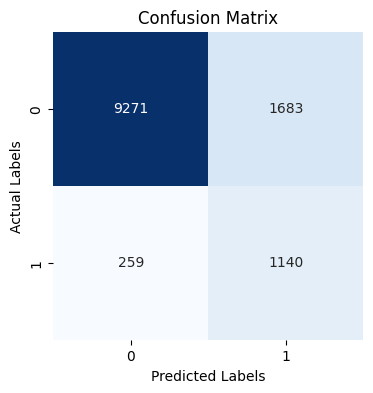

In [73]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

plt.show()